# csv 데이터 확인

In [4]:
import pandas as pd

train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
submission_df = pd.read_csv("./data/sample_submission.csv")

In [2]:
# one-hot encoding 된 출력
train_df

image_id  healthy  multiple_diseases  rust  scab
0        Train_0        0                  0     0     1
1        Train_1        0                  1     0     0
2        Train_2        1                  0     0     0
3        Train_3        0                  0     1     0
4        Train_4        1                  0     0     0
...          ...      ...                ...   ...   ...
1816  Train_1816        0                  0     0     1
1817  Train_1817        1                  0     0     0
1818  Train_1818        1                  0     0     0
1819  Train_1819        0                  0     1     0
1820  Train_1820        0                  0     0     1

[1821 rows x 5 columns]

In [3]:
test_df

image_id
0        Test_0
1        Test_1
2        Test_2
3        Test_3
4        Test_4
...         ...
1816  Test_1816
1817  Test_1817
1818  Test_1818
1819  Test_1819
1820  Test_1820

[1821 rows x 1 columns]

In [6]:
submission_df # 각 상태에 대한 확률

image_id  healthy  multiple_diseases  rust  scab
0        Test_0     0.25               0.25  0.25  0.25
1        Test_1     0.25               0.25  0.25  0.25
2        Test_2     0.25               0.25  0.25  0.25
3        Test_3     0.25               0.25  0.25  0.25
4        Test_4     0.25               0.25  0.25  0.25
...         ...      ...                ...   ...   ...
1816  Test_1816     0.25               0.25  0.25  0.25
1817  Test_1817     0.25               0.25  0.25  0.25
1818  Test_1818     0.25               0.25  0.25  0.25
1819  Test_1819     0.25               0.25  0.25  0.25
1820  Test_1820     0.25               0.25  0.25  0.25

[1821 rows x 5 columns]

([<matplotlib.patches.Wedge at 0x15500a910>,
 [Text(0.6921787180836257, 0.8549202431993926, 'healthy'),
  Text(-0.3942932497177081, 1.0269044908008969, 'multiple_diseases'),
  Text(-1.0996317038245758, -0.028462535794632145, 'rust'),
  Text(0.5744651016901711, -0.9380777403499678, 'scab')],
 [Text(0.377552028045614, 0.4663201326542141, '28.3%'),
  Text(-0.21506904530056806, 0.5601297222550345, '5.0%'),
  Text(-0.5997991111770412, -0.015525019524344805, '34.2%'),
  Text(0.31334460092191146, -0.5116787674636187, '32.5%')])

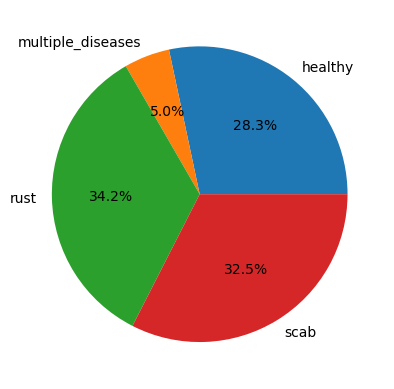

In [12]:
import matplotlib.pyplot as plt

healthy = train_df.loc[train_df["healthy"] == 1]
multiple_diseases = train_df.loc[train_df["multiple_diseases"] == 1]
rust = train_df.loc[train_df["rust"] == 1]
scab = train_df.loc[train_df["scab"] == 1]

# multiple diseases의 비중이 상대적으로 적다
plt.pie([len(healthy), len(multiple_diseases), len(rust), len(scab)],
        labels=["healthy", "multiple_diseases", "rust", "scab"],
        autopct="%.1f%%")

# Image 데이터 확인

In [31]:
from matplotlib.gridspec import GridSpec
import cv2

def show_images(image_ids, rows=2, cols=3):
    plt.figure(figsize=(15, 8))
    grid = GridSpec(rows, cols)

    for i, image_id in enumerate(image_ids):
        image_file_path = f"./data/images/{image_id}.jpg"
        image = cv2.imread(image_file_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        ax = plt.subplot(grid[i])
        ax.imshow(image)

In [32]:
healthy_image_ids = train_df.loc[train_df["healthy"] == 1][-6:]["image_id"].tolist()
multiple_diseases_image_ids = train_df.loc[train_df["multiple_diseases"] == 1][-6:]["image_id"].tolist()
rust_image_ids = train_df.loc[train_df["rust"] == 1][-6:]["image_id"].tolist()
scab_image_ids = train_df.loc[train_df["scab"] == 1][-6:]["image_id"].tolist()

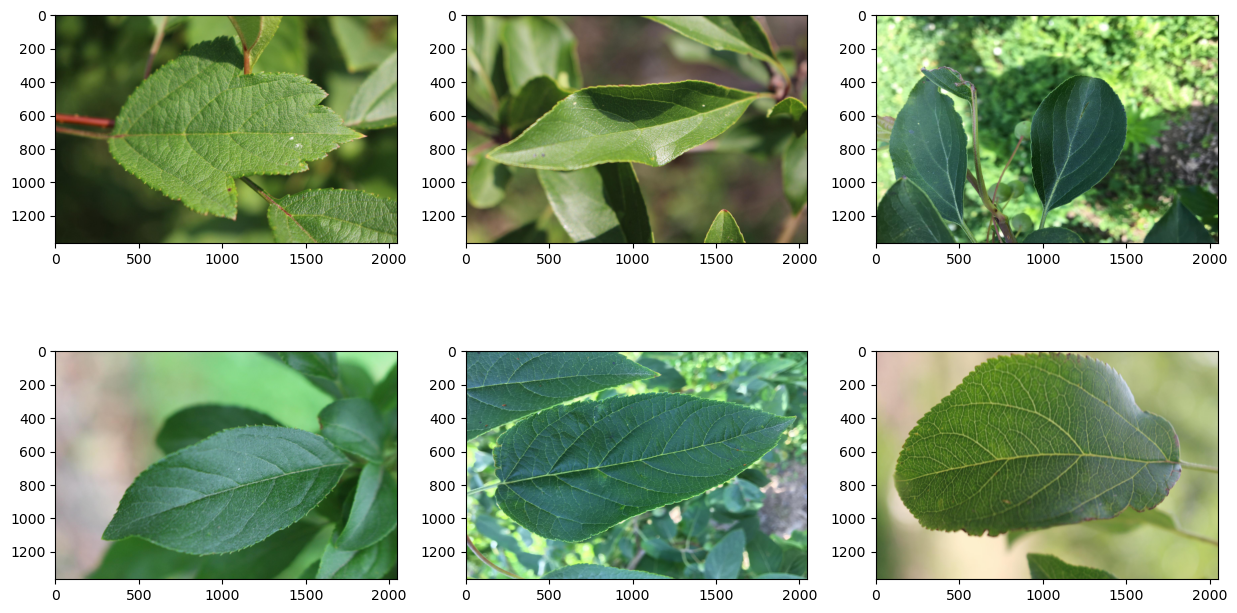

In [37]:
show_images(healthy_image_ids)

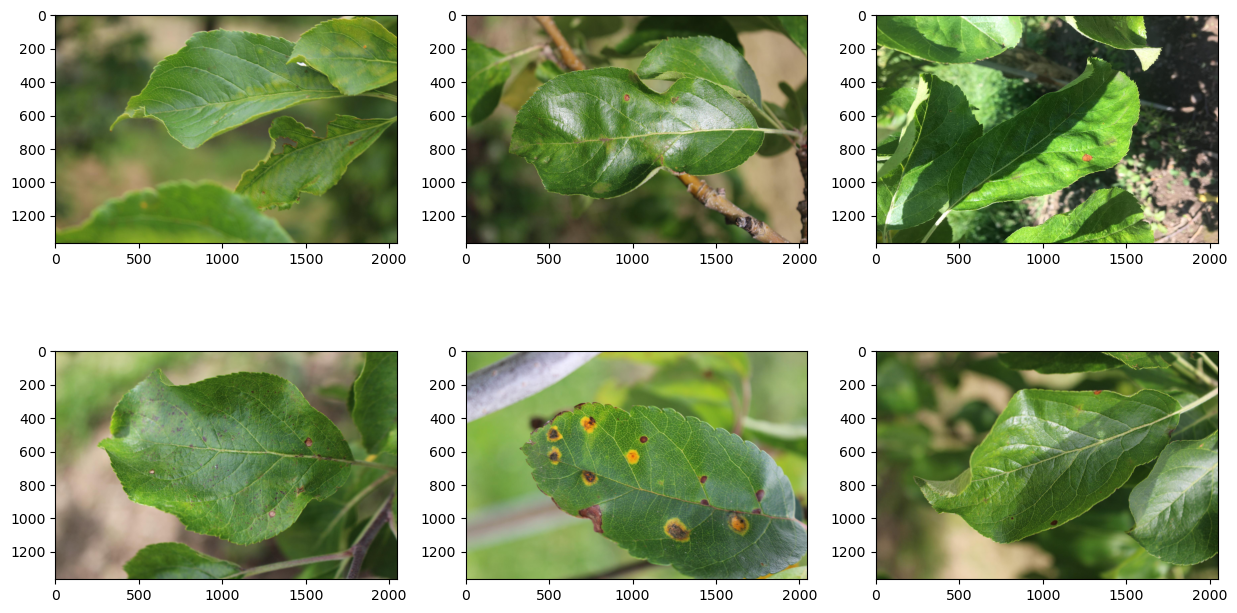

In [38]:
show_images(multiple_diseases_image_ids)

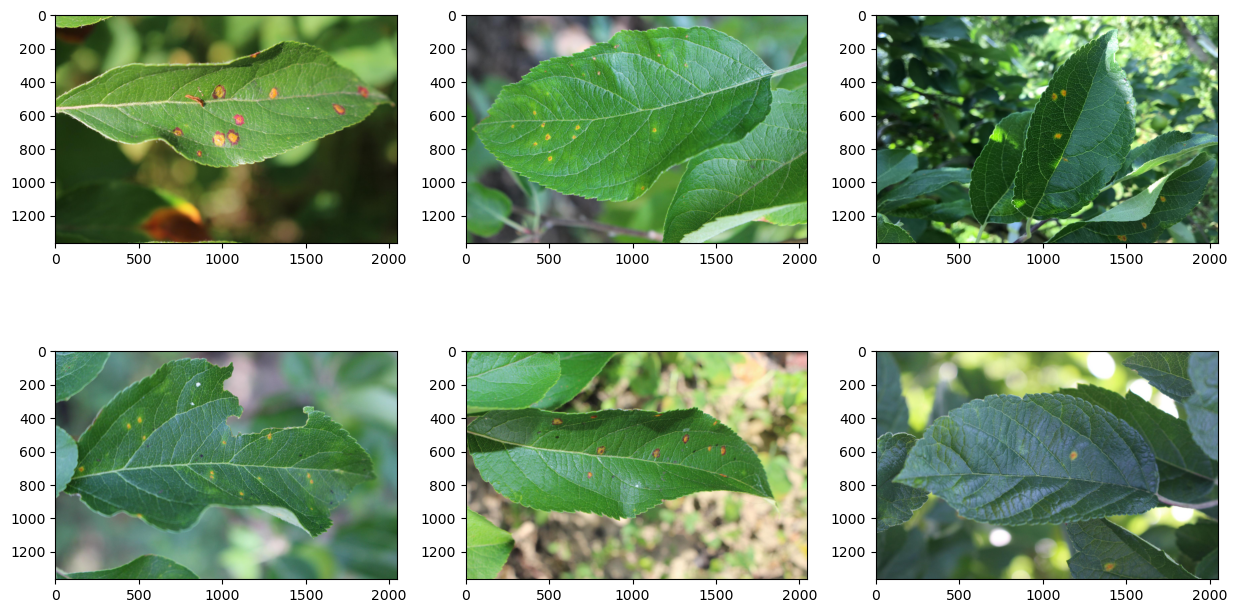

In [35]:
show_images(rust_image_ids)

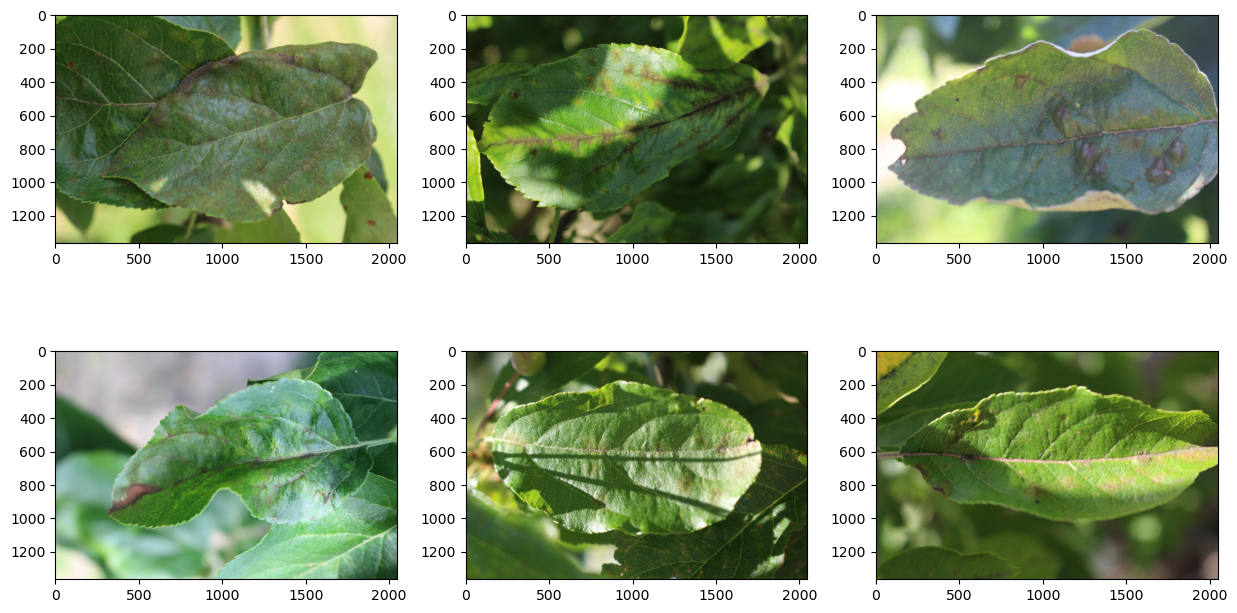

In [36]:
show_images(scab_image_ids)